In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
import myMLlib as lb
import pandas as pd

In [2]:
folderpath= ('/home/yuqster/files/research/dataset/autostop_new1','/home/yuqster/files/research/dataset/autostop_new2',
             '/home/yuqster/files/research/dataset/autostop_new3','/home/yuqster/files/research/dataset/autostop_new4')


materials = ['air','water']

In [3]:
data_list,labels = lb.load_data_list(folderpath,materials, 4e4)
X = []
y = []
for i,_ in enumerate(folderpath):
    X.append(np.array(data_list[i]))
    y.append(np.array(labels[i]))
air = []
water = []
air = []
water = []
for i, _ in enumerate(folderpath):
    index = {}
    unique_labels = np.unique(y[i])   # 注意这里 y[i] 而不是 y[0]
    index['air'] = np.where(y[i] == unique_labels[0])
    index['water'] = np.where(y[i] == unique_labels[1])
    air.append(X[i][index['air']].squeeze())
    water.append(X[i][index['water']].squeeze())




In [4]:
time_file = pd.read_csv('/home/yuqster/files/research/dataset/autostop_new1/time_vector.csv',usecols=[1])
time = np.array(time_file).squeeze()

In [6]:
fs = len(time)/time[-1]
print(fs)
air_mean =[]
water_mean = []
for i,_ in enumerate(folderpath):
    air_mean.append(air[i].mean(axis=0))
    water_mean.append(water[i].mean(axis=0))

13892280.558947226


In [7]:

# pick 100 freqs between 20 kHz and 200 kHz:
freqs = np.linspace(20e3, 800e3, num=600)

wavelet = pywt.ContinuousWavelet('cmor10-1.0')
# compute scales that correspond to those freqs
scales = wavelet.center_frequency * fs / freqs

air_cwtmatr = []
air_freqs_out = []
# now do the transform
for seq in air_mean:  # 直接遍历 water 列表，而不是用索引
    cwt_res, freqs = pywt.cwt(
        seq,
        scales,
        wavelet,
        sampling_period=1 / fs
    )
    air_cwtmatr.append(cwt_res)
    air_freqs_out.append(freqs)


In [8]:
water_cwtmatr = []
water_freqs_out = []


# now do the transform

for seq in water_mean:  # 直接遍历 water 列表，而不是用索引
    cwt_res, freqs = pywt.cwt(
        seq,
        scales,
        wavelet,
        sampling_period=1 / fs
    )
    water_cwtmatr.append(cwt_res)
    water_freqs_out.append(freqs)

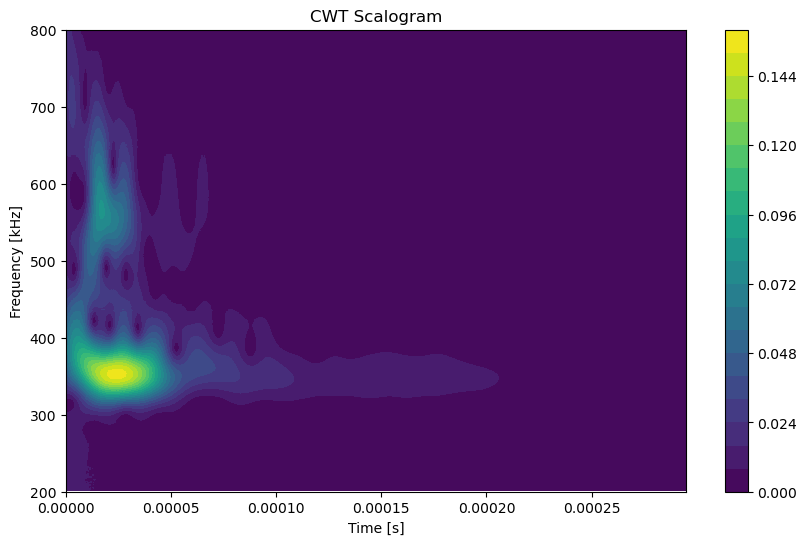

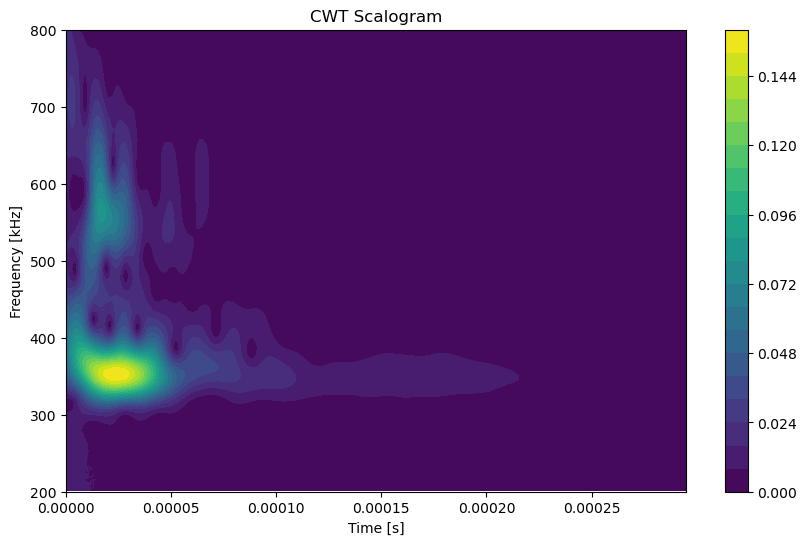

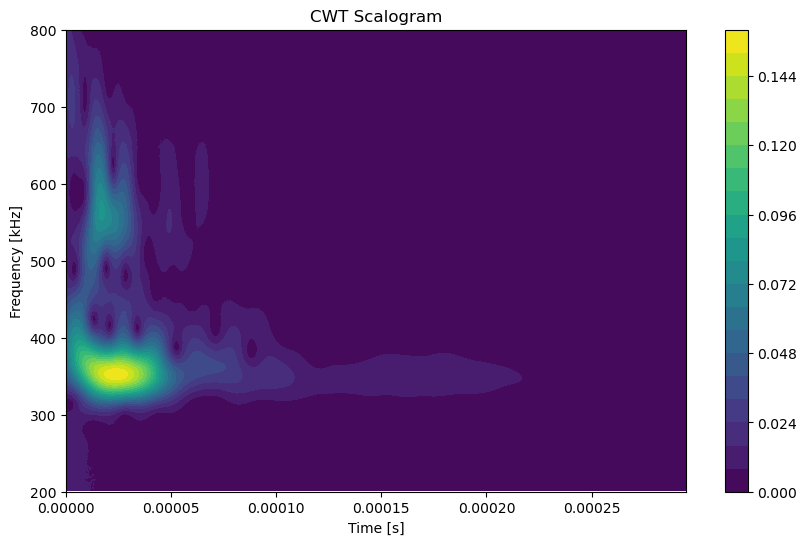

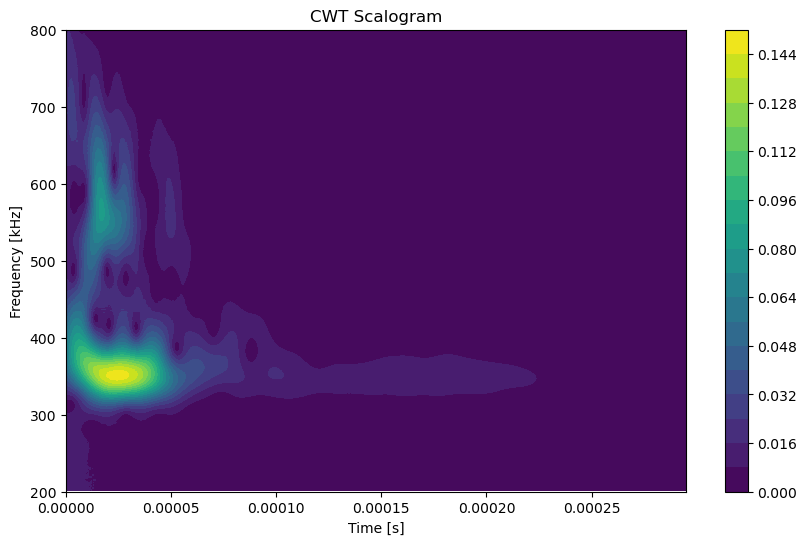

In [9]:
for seq in air_cwtmatr:
    lb.plotCWTscalogram(time,freqs,seq,figuresize=(10,6),frerange=[200e3,800e3],contourplot=True,cmapnum=20)

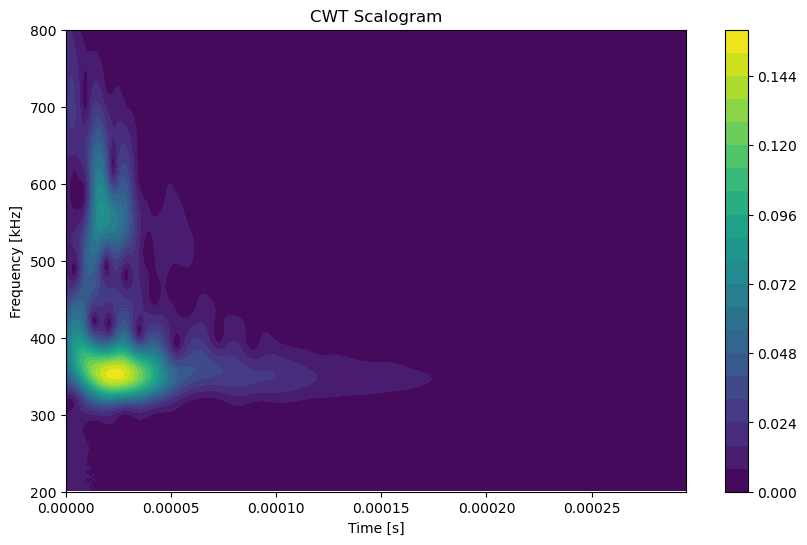

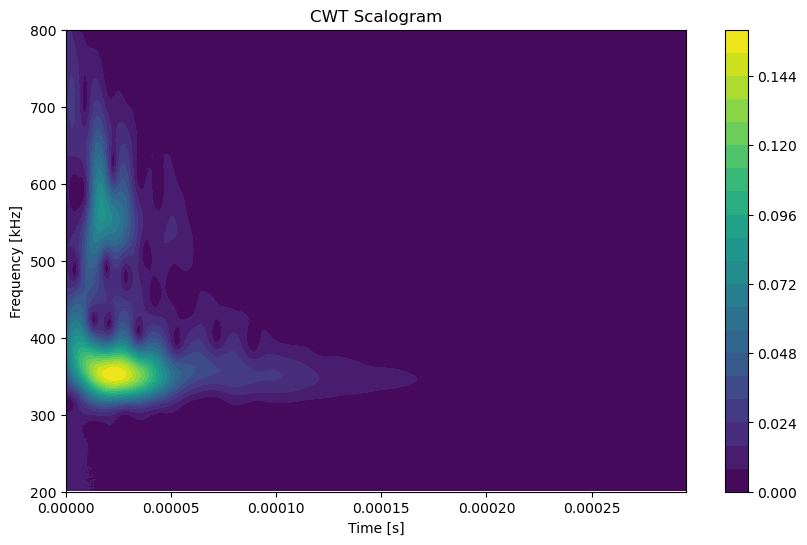

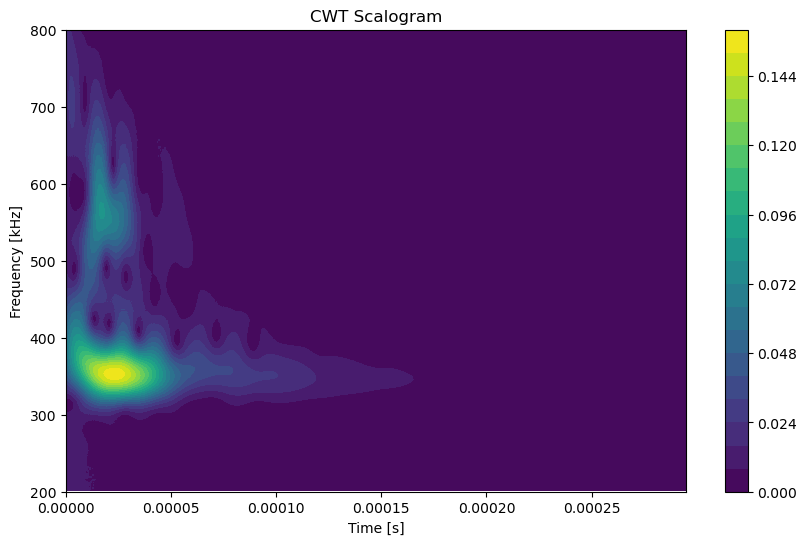

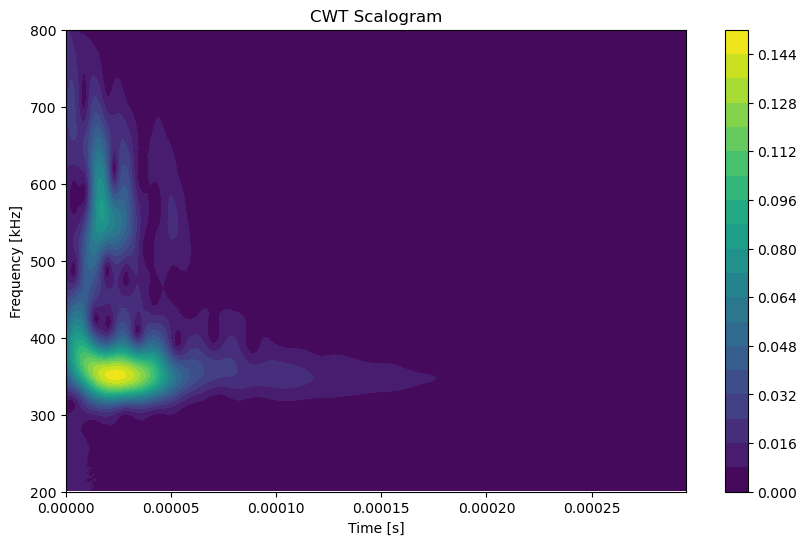

In [10]:
for seq in water_cwtmatr:
    lb.plotCWTscalogram(time,freqs,seq,figuresize=(10,6),frerange=[200e3,800e3],contourplot=True,cmapnum=20)